In [2]:
from dask.distributed import Client, LocalCluster
import intake
import dask
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

In [2]:
xr.__version__

'2023.4.2'

In [4]:
with dask.config.set({"distributed.scheduler.worker-saturation": 1.0}):
    #client = Client()
    client = Client(LocalCluster(local_directory='/scratch/b/b381258/')) 


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36303 instead
  warnings.warn(


In [5]:
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/b381258/levante-spawner-preset//proxy/36303/status,
Dashboard: /user/b381258/levante-spawner-preset//proxy/36303/status,Workers: 9
Total threads: 54,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45081,Workers: 9
Dashboard: /user/b381258/levante-spawner-preset//proxy/36303/status,Total threads: 54
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:44201,Total threads: 6
Dashboard: /user/b381258/levante-spawner-preset//proxy/36567/status,Memory: 11.11 GiB
Nanny: tcp://127.0.0.1:41663,


In [6]:
import numpy as np
from scipy.interpolate import griddata  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import intake
import dask
import multiprocessing
import xarray as xr
import sys
ncpu = multiprocessing.cpu_count()
threads = 6
nworker = 16 #ncpu//threads
threads = ncpu // nworker
print(f'Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}')

Number of CPUs: 256, number of threads: 16, number of workers: 16


In [3]:
with dask.config.set({"distributed.scheduler.worker-saturation": 1.0}):
    client = Client(processes=True, threads_per_worker=threads, 
                    n_workers=nworker, memory_limit='auto',
                    #environ={"MALLOC_TRIM_THRESHOLD_": 0},
                    local_directory='/scratch/b/b381258/')

In [4]:
with dask.config.set({"distributed.scheduler.worker-saturation": 1.0}):
    client = Client(processes=True, threads_per_worker=threads, 
                    n_workers=nworker, memory_limit='256GB',
                    #environ={"MALLOC_TRIM_THRESHOLD_": 0},
                    local_directory='/scratch/b/b381258/')

2024-01-22 14:56:03,431 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14:56:03,459 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14:56:03,483 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14:56:03,511 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14:56:03,517 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14:56:03,524 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14:56:03,530 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 256GB due to system memory limit of 235.37 GiB
2024-01-22 14

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/b381258/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/b381258/levante-spawner-preset//proxy/8787/status,Workers: 16
Total threads: 256,Total memory: 474.07 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40517,Workers: 16
Dashboard: /user/b381258/levante-spawner-preset//proxy/8787/status,Total threads: 256
Started: Just now,Total memory: 474.07 GiB
Comm: tcp://127.0.0.1:34125,Total threads: 16
Dashboard: /user/b381258/levante-spawner-preset//proxy/34451/status,Memory: 29.63 GiB
Nanny: tcp://127.0.0.1:33501,


In [8]:
dask.config.config.get('distributed').get('dashboard')

{'link': '{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status',
 'export-tool': False,
 'graph-max-items': 5000,
 'prometheus': {'namespace': 'dask'}}

In [3]:
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

In [3]:
root_path = '/work/ik1017/Catalogs/'
#root_path = '/pool/data/Catalogs/Candidates/'
#root_path = '/pool/data/Catalogs/'
#col_url = f"{root_path}mistral-cmip6.json"
col_url = f"{root_path}dkrz_cmip-data-pool_disk_netcdf.json"
col_url = f"{root_path}dkrz_cmip6_disk.json"
#col_url = f"{root_path}dkrz_cmip6_disk.json"
col = intake.open_esm_datastore(col_url)
col

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/intake_esm/cat.py:264: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,unique
activity_id,20
institution_id,39
source_id,103
experiment_id,214
member_id,479
table_id,39
variable_id,1164
grid_label,12
dcpp_init_year,63
version,753


In [1]:
models = ['CanESM2', 'CESM2', 'CNRM-CM6-1', 
          'GFDL-ESM4', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR',
          'MIROC-ES2L','MIROC-ES2L','UKESM1-0-LL'
         ]

models = []
models =  ['CanESM5', 'MPI-ESM1-2-LR']#,
models += ['CNRM-CM6-1','IPSL-CM6A-LR']#, 'MPI-ESM1-2-LR'] # 'EC-Earth3' not working, 
models += ['MPI-ESM1-2-HR', 'MIROC6', 'UKESM1-0-LL']
models = ['INM-CM5-0']

In [7]:
model_ls_zg = np.unique(cat.df['source_id'])
model_ls_zg

array(['CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CanESM5',
       'EC-Earth3', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-2-G',
       'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0',
       'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR',
       'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM', 'UKESM1-0-LL'],
      dtype=object)

In [10]:
models = ['CanESM2', 'CESM2', 'CNRM-CM6-1', 
          'GFDL-ESM4', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR',
          'MIROC-ES2L','MIROC-ES2L','UKESM1-0-LL'
         ]

table_id = 'Eday'#'EdayZ'
sel_var = 'ua'
experiment_id = 'historical'#'amip'

query = dict(experiment_id=experiment_id, table_id=table_id, 
             variable_id=[sel_var])#, source_id=models)
cat = col.search(**query)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,...,frequency,time_reduction,long_name,units,realm,level_type,time_min,time_max,format,uri
0,CMIP,AWI,AWI-ESM-1-1-LR,historical,r1i1p1f1,Eday,ua,gn,NaN,v20200212,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18500101,18501231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-ESM...
1,CMIP,AWI,AWI-ESM-1-1-LR,historical,r1i1p1f1,Eday,ua,gn,NaN,v20200212,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18510101,18511231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-ESM...
2,CMIP,AWI,AWI-ESM-1-1-LR,historical,r1i1p1f1,Eday,ua,gn,NaN,v20200212,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18520101,18521231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-ESM...
3,CMIP,AWI,AWI-ESM-1-1-LR,historical,r1i1p1f1,Eday,ua,gn,NaN,v20200212,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18530101,18531231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-ESM...
4,CMIP,AWI,AWI-ESM-1-1-LR,historical,r1i1p1f1,Eday,ua,gn,NaN,v20200212,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18540101,18541231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-ESM...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Eday,ua,gr1,NaN,v20190726,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19300101.0,19491231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/NOAA-GFDL/G...
4956,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Eday,ua,gr1,NaN,v20190726,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19500101.0,19691231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/NOAA-GFDL/G...
4957,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Eday,ua,gr1,NaN,v20190726,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19700101.0,19891231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/NOAA-GFDL/G...
4958,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Eday,ua,gr1,NaN,v20190726,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19900101.0,20091231,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/NOAA-GFDL/G...


In [9]:
model_ls_ua = np.unique(cat.df['source_id'])
model_ls_ua

array(['CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'EC-Earth3', 'GFDL-CM4',
       'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-2-G', 'HadGEM3-GC31-LL',
       'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR',
       'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
       'NorESM2-LM', 'UKESM1-0-LL'], dtype=object)

In [ ]:
query = dict(experiment_id='amip', table_id='EdayZ', 
             variable_id='utendogw')#, source_id='INM-CM5-0')
cat = col.search(**query)
model_ls_ogwd = np.unique(cat.df['source_id'])
model_ls_ogwd

In [ ]:
np.isin(model_ls_ogwd, model_ls)

In [ ]:
models = ['INM.INM-CM5-0']#['INM.INM-CM5-0','IPSL.IPSL-CM6A-LR']#,'MPI-ESM1-2-HR']#'MIROC6','UKESM1-0-LL',['CanESM5', 'MPI-ESM1-2-LR','CNRM-CM6-1']#'CESM2-WACCM']
query = dict(experiment_id='amip', table_id='day', 
             variable_id=['ua','zg'], source_id=models)
cat = col.search(**query)
cat.df

In [ ]:
models = ['INM.INM-CM5-0']#['INM.INM-CM5-0','IPSL.IPSL-CM6A-LR']#,'MPI-ESM1-2-HR']#'MIROC6','UKESM1-0-LL',['CanESM5', 'MPI-ESM1-2-LR','CNRM-CM6-1']#'CESM2-WACCM']
query = dict(experiment_id='historical', table_id='Eday', 
             variable_id='ua10', source_id=models)
cat = col.search(**query)
cat.df

In [14]:
cat.df['uri'].iloc[-5]

'/work/ik1017/CMIP6/data/CMIP6/CMIP/CCCma/CanESM5/historical/r9i1p2f1/Eday/ua/gn/v20190429/ua_Eday_CanESM5_historical_r9i1p2f1_gn_19710101-19801231.nc'

In [7]:
ds = xr.open_dataset(cat.df['uri'][0])
ds

<xarray.Dataset>
Dimensions:    (time: 4015, bnds: 2, plev: 19, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-01 12:00:00 ... 1860-12-31 12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ua         (time, plev, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           7c87dd3a822d55650b3c17cd65db0ca251282530
    CCCma_runid:                 p2-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/3b92fc96-3dc8-490a-83de-6da578a...
    variable_id:                 ua
    variant_label:               r10i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [9]:
cat

,unique
activity_id,0
institution_id,0
source_id,0
experiment_id,0
member_id,0
table_id,0
variable_id,0
grid_label,0
dcpp_init_year,0
version,0


In [6]:
table_id = 'day'#'EdayZ'
sel_var = 'ua'
experiment_id = 'historical'#'amip'

query = dict(experiment_id=experiment_id, table_id='Eday', 
             variable_id=[sel_var], source_id='CanESM5')
cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,10
table_id,1
variable_id,1
grid_label,1
dcpp_init_year,0
version,1


In [19]:
query = dict(experiment_id=experiment_id, table_id='Eday', 
             variable_id=[sel_var], source_id=model)
cat = col.search(**query)

In [20]:
cat.df#.table_id.unique()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,...,frequency,time_reduction,long_name,units,realm,level_type,time_min,time_max,format,uri
0,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18500101.0,18501231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
1,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18510101.0,18511231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
2,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18520101.0,18521231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
3,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18530101.0,18531231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
4,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,18540101.0,18541231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,CMIP,MIROC,MIROC6,historical,r9i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19260101.0,19261231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
1246,CMIP,MIROC,MIROC6,historical,r9i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19270101.0,19271231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
1247,CMIP,MIROC,MIROC6,historical,r9i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19280101.0,19281231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...
1248,CMIP,MIROC,MIROC6,historical,r9i1p1f1,Eday,ua,gn,NaN,v20191016,...,day,mean,Eastward Wind,m s-1,atmos,NaN,19290101.0,19291231.0,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...


In [23]:
print('asdas')

asdas


In [ ]:
table_id = 'Eday'
sel_var = 'ua'#'zg'
experiment_id = 'historical'#'amip'
user = 'b381258'
outpath=f'/work/bd1022/{user}/'
models = ['MIROC6']

for model in models:
    print(model)
    query = dict(experiment_id=experiment_id, table_id=table_id, 
                 variable_id=[sel_var], source_id=model)
    cat = col.search(**query)
    print(model)
    #sys.exit()
    #with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dset_dict = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": -1}})
    """dset_dict = cat.to_dataset_dict(xarray_open_kwargs={
        'chunks': {'time': 365},
        'decode_times': False,
    },) # , 'plev': 1
    """    
        


    for k, ds in dset_dict.items():
        print(k)
        #ds_sel = ds.copy()
        ds_sel = ds.sel(
            plev = 1000,
            time = slice('1979', '2014')
        ).sel(lat = 60, method = 'nearest').mean('lon')

        ds_sel_winter = ds_sel[[sel_var]].sel(time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3,4])).squeeze().reset_coords(drop = True)
        #sys.exit()
        output = f'{outpath}CMIP6/including_April/{k}_{sel_var}_1979-2014.nc'
        print(output)
        ds_sel_winter.to_netcdf(output)

MIROC6
MIROC6

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/tmp/ipykernel_360029/4012774812.py:16: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dset_dict = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": -1}})


In [15]:
table_id = 'EdayZ'
sel_var = 'ua'#'zg'
experiment_id = 'historical'#'amip'
user = 'b381258'
outpath=f'/work/bd1022/{user}/'



query = dict(experiment_id=experiment_id, table_id=table_id, 
             variable_id=[sel_var], source_id='CESM2')
cat = col.search(**query)
print(model)
#sys.exit()
#with dask.config.set(**{'array.slicing.split_large_chunks': True}):
dset_dict = cat.to_dataset_dict(xarray_open_kwargs={'chunks': {'time': 365}},) # , 'plev': 1




for k, ds in dset_dict.items():
    #ds_sel = ds.copy()
    ds_sel = ds.sel(
        plev = 1000,
        time = slice('1979', '2014')
    ).sel(lat = 60, method = 'nearest')

    ds_sel_winter = ds_sel[[sel_var]].sel(time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3,4])).squeeze().reset_coords(drop = True)
    #sys.exit()
    output = f'{outpath}CMIP6/including_April/{k}_{sel_var}_1979-2014.nc'
    print(output)
    ds_sel_winter.to_netcdf(output)

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


CanESM5

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
/sw/spack-levante/mambaf

/work/bd1022/b381258/CMIP6/including_April/CMIP.CESM2.historical.EdayZ.gn_ua_1979-2014.nc


In [16]:
ds_sel_winter

<xarray.Dataset>
Dimensions:    (member_id: 11, time: 6516)
Coordinates:
  * member_id  (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
  * time       (time) object 1979-01-01 00:00:00 ... 2014-12-31 00:00:00
Data variables:
    ua         (member_id, time) float32 dask.array<chunksize=(1, 181), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:time_reduction:   mean
    intake_esm_attrs:long_name:       Eastward Wind
    intake_esm_attrs:units:           m s-1
    intake_esm_attrs:realm:           atmos
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           CMIP.CESM2.historical.EdayZ.gn

In [11]:
query = dict(experiment_id=experiment_id, table_id=table_id, 
                 variable_id=sel_var, source_id='CESM2')
cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,10
table_id,1
variable_id,1
grid_label,1
dcpp_init_year,0
version,3


In [31]:
user = 'b381258'
outpath=f'/work/bd1022/{user}/'

for model in ['IPSL-CM6A-LR']:# model_ls_zg[4:]:
    print(model)
    query = dict(experiment_id=experiment_id, table_id=table_id, 
                 variable_id=sel_var, source_id=model)
    cat = col.search(**query)
    #with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    #try:
    dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 365, 'plev': 1}},)

    for k, ds in dset_dict.items():
        #ds_sel = ds.copy()
        ds_sel = ds.sel(
            plev = 1000,
            time = slice('1979', '2014')
        )

        ds_sel_winter = ds_sel[[sel_var]].sel(time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3])).squeeze().reset_coords(drop = True)
        sys.exit()
        output = f'{outpath}CMIP6/{k}_{sel_var}_1979-2014.nc'
        print(output)
        ds_sel_winter.to_netcdf(output)
    #except:
    #    pass

IPSL-CM6A-LR

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise

SystemExit: 

/work/bd1022/b381258/myenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
user = 'b381258'
outpath=f'/work/bd1022/{user}/'

for model in ['IPSL-CM6A-LR']:# model_ls_zg[4:]:
    print(model)
    query = dict(experiment_id=experiment_id, table_id=table_id, 
                 variable_id=sel_var, source_id=model)
    cat = col.search(**query)
    #with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    #try:
    dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 365, 'plev': 1}},)

    for k, ds in dset_dict.items():
        #ds_sel = ds.copy()
        ds_sel = ds.sel(
            plev = 1000,
            time = slice('1979', '2014')
        )

        ds_sel_winter = ds_sel[[sel_var]].sel(time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3])).squeeze().reset_coords(drop = True)
        sys.exit()
        output = f'{outpath}CMIP6/{k}_{sel_var}_1979-2014.nc'
        print(output)
        ds_sel_winter.to_netcdf(output)
    #except:
    #    pass

IPSL-CM6A-LR

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 39
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 39
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 39
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 39
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 39
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 39
  result = blockwise

NameError: name 'sys' is not defined

In [32]:
ds

<xarray.Dataset>
Dimensions:         (lat: 143, lon: 144, plev: 19, time: 21915,
                     dcpp_init_year: 1, member_id: 21, axis_nbounds: 2)
Coordinates:
  * lat             (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * plev            (plev) float32 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time            (time) datetime64[ns] 1958-01-01T12:00:00 ... 2017-12-31T...
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    ua              (member_id, dcpp_init_year, time, plev, lat, lon) float32 dask.array<chunksize=(1, 1, 365, 1, 143, 144), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    description:                      DECK: AMIP
    title:                            IPSL-CM6A-LR model output prepared for ...
    activity_id:                      CMIP
    contact:                          ipsl-cmip6@listes.ipsl.fr
    data_specs_version:               01.00.21
    ...                               ...
    intake_esm_attrs:long_name:       Eastward Wind
    intake_esm_attrs:units:           m s-1
    intake_esm_attrs:realm:           atmos
    intake_esm_attrs:_data_format_:   netcdf
    nco_openmp_thread_number:         1
    intake_esm_dataset_key:           CMIP.IPSL-CM6A-LR.amip.Eday.gr

In [33]:
ds['ua'].squeeze()

<xarray.DataArray 'ua' (member_id: 21, time: 21915, plev: 19, lat: 143, lon: 144)>
dask.array<getitem, shape=(21, 21915, 19, 143, 144), dtype=float32, chunksize=(1, 365, 1, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * plev            (plev) float32 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time            (time) datetime64[ns] 1958-01-01T12:00:00 ... 2017-12-31T...
    dcpp_init_year  float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
Attributes:
    long_name:           Eastward Wind
    units:               m s-1
    online_operation:    average
    cell_methods:        time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       eastward_wind
    description:         resolution: 17 standard level.
    history:             none
    cell_measures:       area: areacella

In [35]:
ds['ua'].squeeze()[0,0].mean('lon')

<xarray.DataArray 'ua' (plev: 19, lat: 143)>
dask.array<mean_agg-aggregate, shape=(19, 143), dtype=float32, chunksize=(1, 143), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * plev            (plev) float32 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
    time            datetime64[ns] 1958-01-01T12:00:00
    dcpp_init_year  float64 nan
    member_id       <U9 'r10i1p1f1'

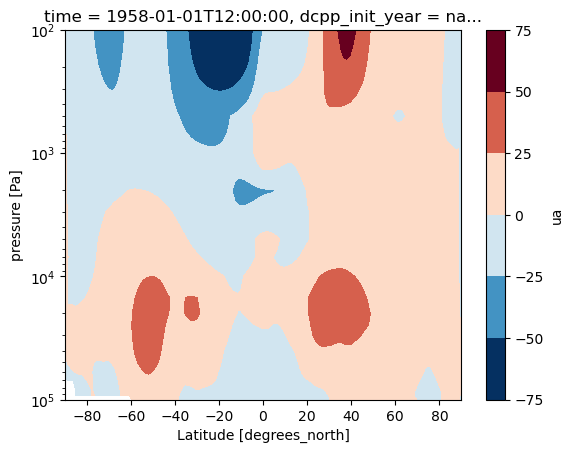

In [37]:
ds['ua'].squeeze()[0,0].mean('lon').plot.contourf(yincrease = False)
plt.yscale('log')

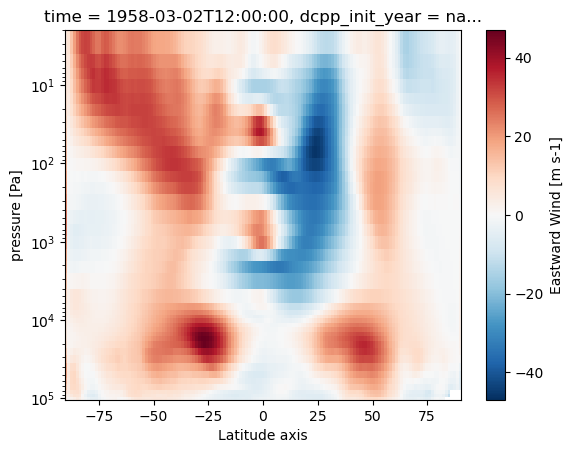

In [27]:
ds['ua'].squeeze()[0,60].plot(yincrease = False)
plt.yscale('log')

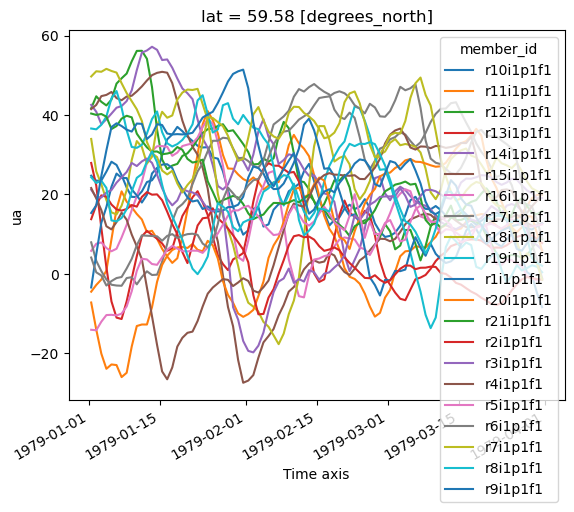

In [39]:
sel_year = 1979
ds_sel_winter['ua'].sel(
    lat = 60, 
    method = 'nearest'
).sel(
    time = slice(f'{sel_year}-01',f'{sel_year}-03')
).mean('lon').plot.line(hue = 'member_id')

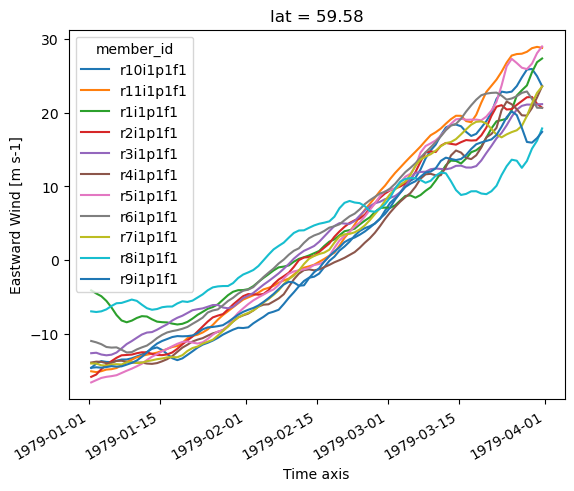

In [17]:
sel_year = 1979
ds_sel_winter['ua'].sel(
    lat = 60, 
    method = 'nearest'
).sel(
    time = slice(f'{sel_year}-01',f'{sel_year}-03')
).plot.line(hue = 'member_id')

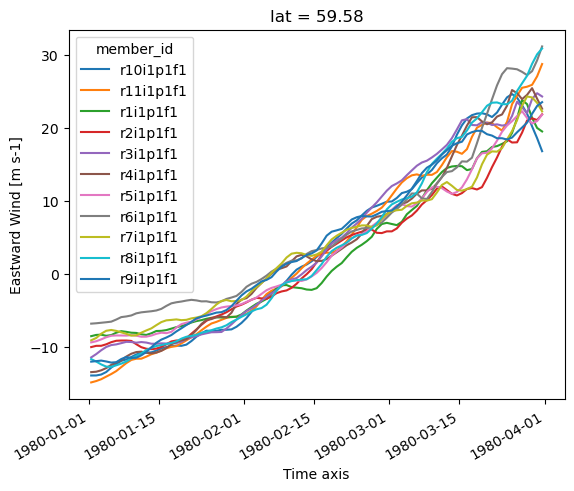

In [18]:
sel_year = 1980
ds_sel_winter['ua'].sel(
    lat = 60, 
    method = 'nearest'
).sel(
    time = slice(f'{sel_year}-01',f'{sel_year}-03')
).plot.line(hue = 'member_id')

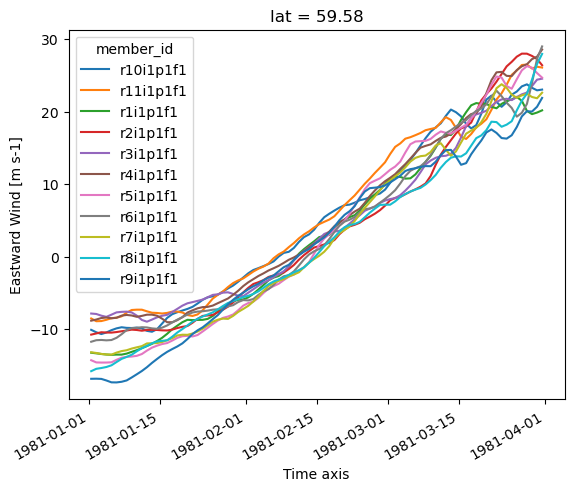

In [19]:
sel_year = 1981
ds_sel_winter['ua'].sel(
    lat = 60, 
    method = 'nearest'
).sel(
    time = slice(f'{sel_year}-01',f'{sel_year}-03')
).plot.line(hue = 'member_id')

In [10]:
user = 'b381258'
outpath=f'/work/bd1022/{user}/'

In [11]:
user = 'b381258'
outpath=f'/work/bd1022/{user}/'

for model in ['IPSL-CM6A-LR']:#model_ls_ua[:]:
    query = dict(experiment_id=experiment_id, table_id=table_id, 
                 variable_id=sel_var, source_id=model)
    cat = col.search(**query)
    #with dask.config.set(**{'array.slicing.split_large_chunks': True}):
        #try:
    dset_dict = cat.to_dataset_dict(
        cdf_kwargs={'chunks': {'member_id': 1, 'plev': 1, 'time': 365}}, # 
    )

    for k, ds in dset_dict.items():
        #ds_sel = ds.copy()
        ds_sel = ds.sel(
            plev = [1000],
            lat = 60,
            method = 'nearest'
        ).sel(
            time = slice('1979-01-01','2014-12-31'),
        )
        
        """ ds_sel = ds['ua'].sel(
            plev = [1000],
            #time = slice(None,'2100-12-31'),
            lat = 60,
            method = 'nearest'
        )
        """
        ds_sel_winter = ds_sel[[sel_var]].sel(
            time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3])
        )
        output = f'{outpath}CMIP6/{k}_{sel_var}.nc'
        print(output)
        ds_sel_winter.to_netcdf(output)
        #except:
        #    pass


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise(
/work/bd1022/b381258/myenv/lib/python3.11/site-packages/dask/array/core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 19
  result = blockwise

/work/bd1022/b381258/CMIP6/CMIP.IPSL-CM6A-LR.amip.Eday.gr_ua.nc


In [13]:
ds

<xarray.Dataset>
Dimensions:         (lat: 143, lon: 144, plev: 19, time: 21915,
                     dcpp_init_year: 1, member_id: 21, axis_nbounds: 2)
Coordinates:
  * lat             (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * plev            (plev) float32 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time            (time) datetime64[ns] 1958-01-01T12:00:00 ... 2017-12-31T...
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    ua              (member_id, dcpp_init_year, time, plev, lat, lon) float32 dask.array<chunksize=(1, 1, 365, 1, 143, 144), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    description:                      DECK: AMIP
    title:                            IPSL-CM6A-LR model output prepared for ...
    activity_id:                      CMIP
    contact:                          ipsl-cmip6@listes.ipsl.fr
    data_specs_version:               01.00.21
    ...                               ...
    intake_esm_attrs:long_name:       Eastward Wind
    intake_esm_attrs:units:           m s-1
    intake_esm_attrs:realm:           atmos
    intake_esm_attrs:_data_format_:   netcdf
    nco_openmp_thread_number:         1
    intake_esm_dataset_key:           CMIP.IPSL-CM6A-LR.amip.Eday.gr

In [12]:
ds_sel_winter

<xarray.Dataset>
Dimensions:         (member_id: 21, dcpp_init_year: 1, time: 5445, plev: 1,
                     lon: 144)
Coordinates:
    lat             float32 59.58
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * plev            (plev) float32 1e+03
  * time            (time) datetime64[ns] 1979-01-01T12:00:00 ... 2014-12-31T...
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
Data variables:
    ua              (member_id, dcpp_init_year, time, plev, lon) float32 dask.array<chunksize=(1, 1, 146, 1, 144), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    description:                      DECK: AMIP
    title:                            IPSL-CM6A-LR model output prepared for ...
    activity_id:                      CMIP
    contact:                          ipsl-cmip6@listes.ipsl.fr
    data_specs_version:               01.00.21
    ...                               ...
    intake_esm_attrs:long_name:       Eastward Wind
    intake_esm_attrs:units:           m s-1
    intake_esm_attrs:realm:           atmos
    intake_esm_attrs:_data_format_:   netcdf
    nco_openmp_thread_number:         1
    intake_esm_dataset_key:           CMIP.IPSL-CM6A-LR.amip.Eday.gr

In [12]:
ds

<xarray.Dataset>
Dimensions:         (lat: 143, lon: 144, plev: 19, time: 21915,
                     dcpp_init_year: 1, member_id: 21, axis_nbounds: 2)
Coordinates:
  * lat             (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * plev            (plev) float32 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * time            (time) datetime64[ns] 1958-01-01T12:00:00 ... 2017-12-31T...
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
    time_bounds     (member_id, time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 365, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    ua              (member_id, dcpp_init_year, time, plev, lat, lon) float32 dask.array<chunksize=(1, 1, 365, 1, 143, 144), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    description:                      DECK: AMIP
    title:                            IPSL-CM6A-LR model output prepared for ...
    activity_id:                      CMIP
    contact:                          ipsl-cmip6@listes.ipsl.fr
    data_specs_version:               01.00.21
    ...                               ...
    intake_esm_attrs:long_name:       Eastward Wind
    intake_esm_attrs:units:           m s-1
    intake_esm_attrs:realm:           atmos
    intake_esm_attrs:_data_format_:   netcdf
    nco_openmp_thread_number:         1
    intake_esm_dataset_key:           CMIP.IPSL-CM6A-LR.amip.Eday.gr

In [ ]:
cat['CMIP.HadGEM3-GC31-LL.amip.EdayZ.gnz'].df

In [ ]:
import xarray as xr

In [ ]:
infile = cat['CMIP.CNRM-CM6-1.amip.EdayZ.grz'].df['uri'].values[0]

In [ ]:
ds = xr.open_dataset(infile)
ds

In [ ]:
!ncdump /work/ik1017/CMIP6/data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/amip/r1i1p1f2/EdayZ/ua/grz/v20181203/ua_EdayZ_CNRM-CM6-1_amip_r1i1p1f2_grz_19790101-20141231.nc | less

In [ ]:
user = 'b381258'
outpath=f'/work/bd1022/{user}/'

for k, ds in dset_dict.items():
    ds_sel = ds['ua'].sel(
        plev = [1000],
        #time = slice(None,'2100-12-31'),
        lat = 60,
        method = 'nearest'
    )
    ds_sel_winter = ds_sel.sel(time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3])).mean(['lon'])
    output = f'{outpath}CMIP6/{k}_ua@10hPa.nc'
    print(output)
    

    
    
    #temp = ds_sel.sel(time = np.isin(ds_sel.time.dt.month, [11,12,1,2,3])).sel(lat = 60, method = 'nearest').mean(['lon','time'])#.load()



    #sys.exit()

    
    ds_sel_winter.to_netcdf(output)
    